In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = "http://bit.ly/w-data"
student = pd.read_csv(data)

# Print the data frame to have a look at the data
student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


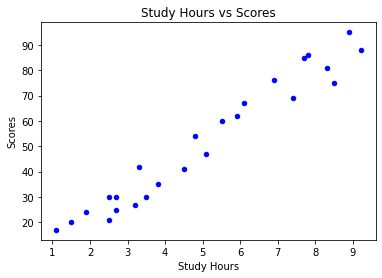

In [5]:
student.plot(kind = 'scatter', x = 'Hours', y = 'Scores', alpha = 1.0, color = 'Blue')
plt.title('Study Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

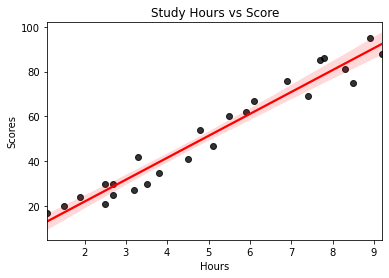

In [6]:
sns.regplot(student['Hours'],student['Scores'],color = 'green',scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Study Hours vs Score')
plt.show()

In [7]:
X = student.iloc[:,:-1].values

# Labels
y = student.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 50)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [10]:
# Printing the Intercept & the Coefficient
print("Intercept: ",reg.coef_)
print("Coefficient: ",reg.intercept_)

Intercept:  [9.77580339]
Coefficient:  2.483673405373196


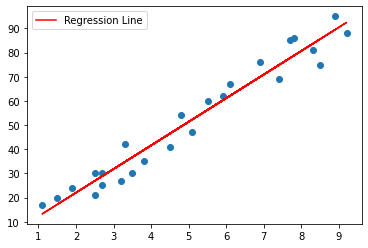

In [11]:
line = reg.intercept_ + (reg.coef_ * X)

# Plotting test data
plt.scatter(X,y)
plt.plot(X,line,color = 'red', label = 'Regression Line')
plt.legend()
plt.show()

In [12]:
print(X_test)

# Storing the predicted values in y_pred
y_pred = reg.predict(X_test)

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [13]:
student_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
student_comp

,Actual,Predicted
0,95,89.488324
1,30,28.878343
2,76,69.936717
3,35,39.631726
4,17,13.237057


In [14]:
print("Training Score: ",reg.score(X_train,y_train))
print("Testing Score: ",reg.score(X_test,y_test))

Training Score:  0.9434439761512203
Testing Score:  0.9764314504425582


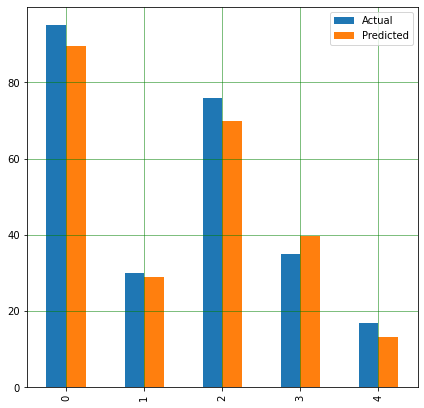

In [15]:
# Plot depicting the comparison between Actual & Predicted Values
student_comp.plot(kind = 'bar', figsize = (7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [16]:
# Predicting the score if a student studies for 9.25 hrs/day
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.90985477015731


In [17]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.2182572418876685
Mean Squared Error: 20.80254458138046
Root Mean Squared Error: 4.560980660053325
R-2: 0.9764314504425582
